<a href="https://colab.research.google.com/github/ben8169/Study/blob/main/DiDL/Word_Embedding(word2vec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Word Embedding(word2vec)</h2>

<h3>15.1. Word Embedding (word2vec)</h3>


*   단어가 의미를 가지듯이, word vector는 단어를 표현하기 위해 사용되는 feature 벡터
*   Word Embedding : word -> vector
*   NLP(Natural Language Processing)의 기본



<h4>15.1.1. One-Hot Vectors Are a Bad Choice</h4>



*   RNN 때는 One-Hot vector를 사용해서 단어를 표현
*   그러나 단어가 N개 있으면, 인덱스도 N개 있어야 하고, 벡터표현도 매우 어려움(0,0,...,1,...0) -> 매우 비효율적
* 또한 one hot vector는 Cosine similarity를 표현할 수 없음(내적이 0)









<h4>15.1.2. Self-Supervised word2vec</h4>



*   이 문제를 해결하기 위해 등장한 tool -> word2vec
* 각 단어에 fixed-length vector를 mapping -> similarity와 analogy relationship(비유 관계) 더 잘 파악함
* *skip-gram, continuous bag of words (CBOW)* 라는 두 모델을 포함함.
* Word2Vec 모델에서 의미 있는 표현을 얻기 위한 훈련은 조건부 확률에 의존하는데, 이는 말뭉치에서 단어들의 주변 단어를 사용하여 특정 단어를 예측하는 것으로 해석할 수 있음. 데이터에 레이블이 없이 수행되기 때문에 skip-gram과 continuous bag of words 모두 self-supervised models(라벨링 없이 input data에 대해 학습하는 머신 러닝 모델)로 간주됨.




<h4>15.1.3. The Skip-Gram Model</h4>



*   Skip-gram model은 단어(center word)가 단어를 둘러싸고 있는 text sequence(context words)를 만들어 낼 수 있다고 가정함.
* "The man loves his son"의 예시

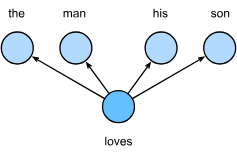


*  "loves"를 center word로 고르고 context window size를 2로 잡으면, skip-gram 모델은 center word인 "loves"를 기준으로 거리가 2 이내인 context words인 “the”, “man”, “his”, “son” 을 생성할 조건부 확률을 구하게 된다.
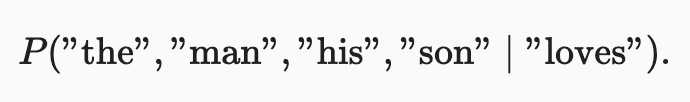
* 여기서 각 context words가 조건부 독립이라면 ("loves"에 의해 독립적으로 각각 생성된 context word라면) 확률은 다음과 같이 재정의된다.
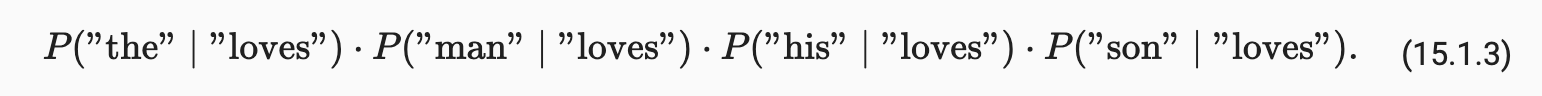


* Skip-gram 모델에서, 각 단어는 조건부확률을 계산하기 위해 2개의 d차원 벡터 표현을 가진다. (ith word has v(i) -> center word, u(i) -> context word)
* 특정 Center word Wc에 대해 context word Wo를 생성할 조건부 확률은 softmax를 거쳐서 다음과 같다.
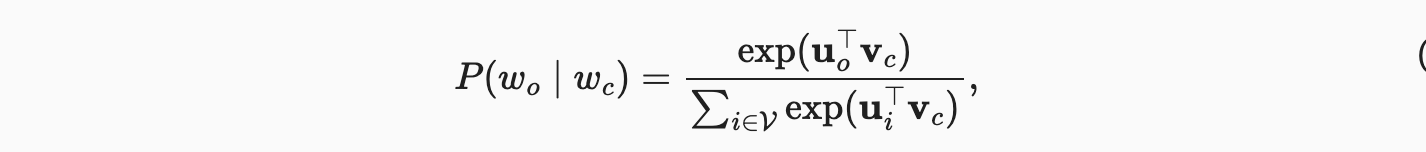


*   word set V = {0,1,....,V-1}
*Text sequence 길이 = T
*word at time step = t(t번째 단어)
*context windows size = m

라고 할 때, skip-gram 모델의 확률 함수란 <b>어떠한 단어를 center word로 잡더라도 모든 context words를 생성할 수 있는 확률</b>과 같다.

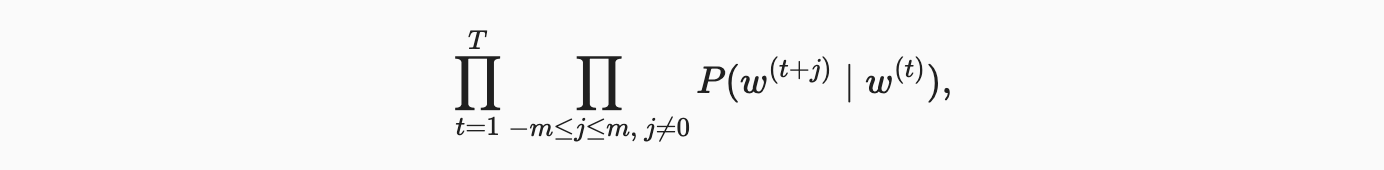



<h4>15.1.3.1. Training</h4>



*   Skip-gram 모델의 parameter = center word / 각 단어의 context word
*Training에서는 위에서 보았던 확률함수를 최대화하는 (= 다음의 확률 함수를 최소화하는)모델 파라미터를 이끌어 낼 것이다,
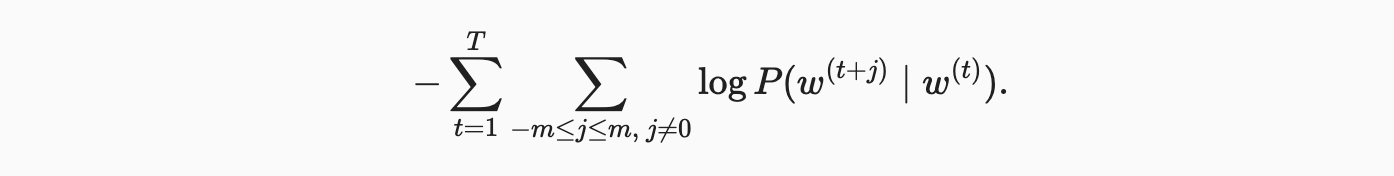

* SGD를 이용하여 loss를 최소화하면, 각 반복마다 더 짧은 subsequence를 샘플링하여 gradient를 계산하여 모델 파라미터를 업데이트 할 수 있음.
*이를 계산하기 위해서 center word vector와 context word vector에 대한 로그 조건부 확률의 gradient를 얻어야 함.
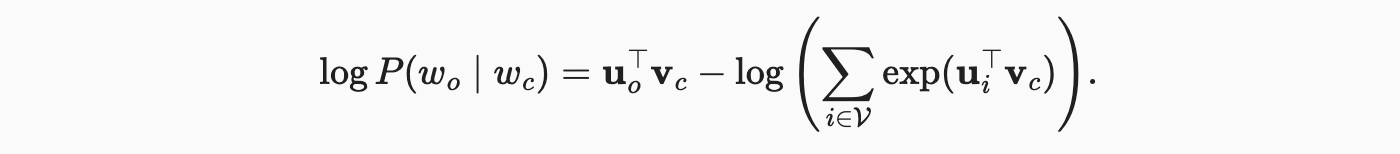
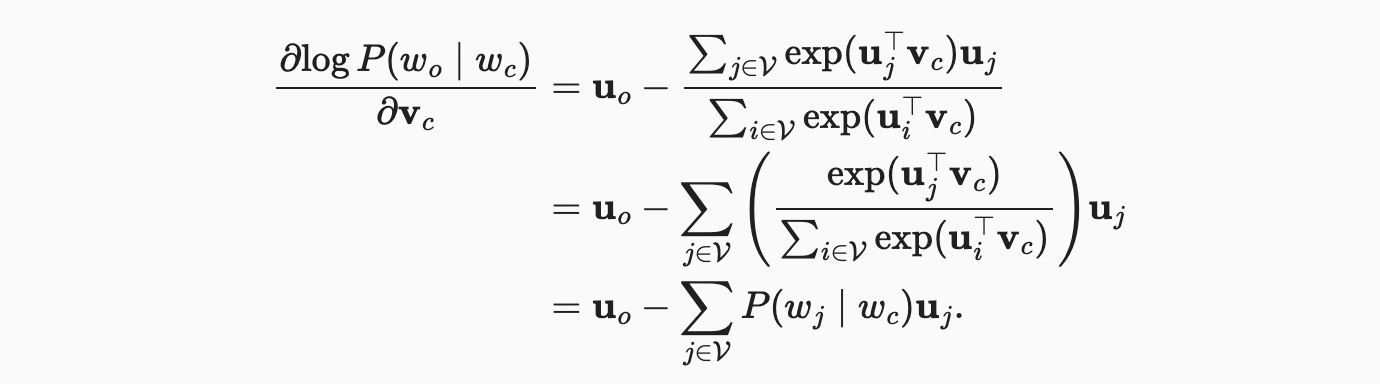

* 해당 계산은 wc를 중심으로 가진 단어들의 모든 조건부 확률을 필요로 함.
* 훈련 후에는 모든 word set 안의 단어가 v(i), u(i)를 얻게 됨.

<h4>15.1.4. The Continuous Bag of Words (CBOW) Model</h4>

*   skip-gram과 유사한데, CBOW는 context words가 center word를 생성할 확률을 기반으로 함.
* 같은 예시, context window size =2일 때의 구조도
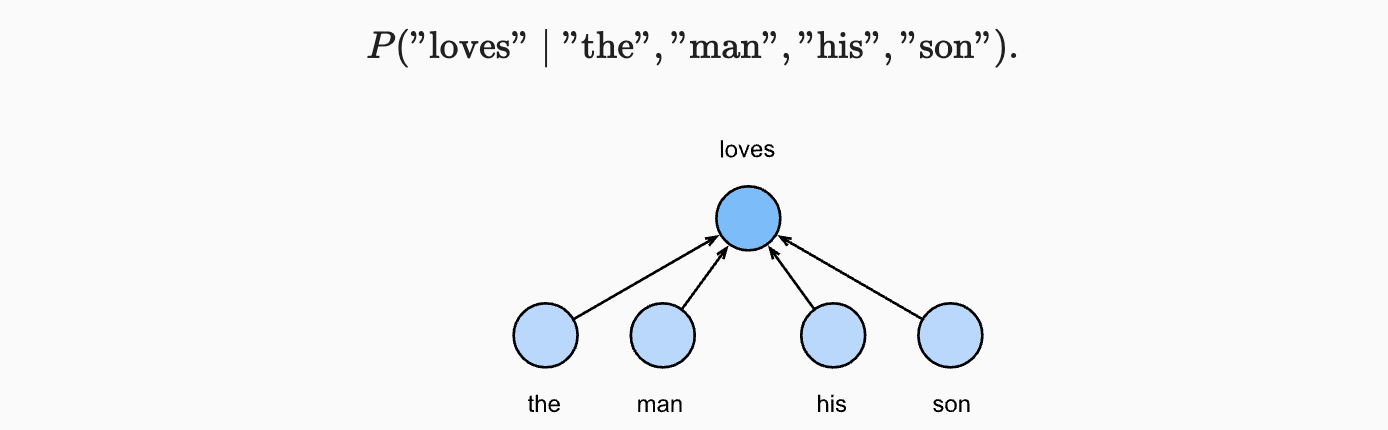

* CBOW 모델에는 다수의 context words가 존재하기 때문에, context word vector들은 조건부 확률계산에 있어서 평균화된다.
* skip-gram 모델과 벡터가 반대가 됨(ith word has v(i) -> context word, u(i) -> center word)

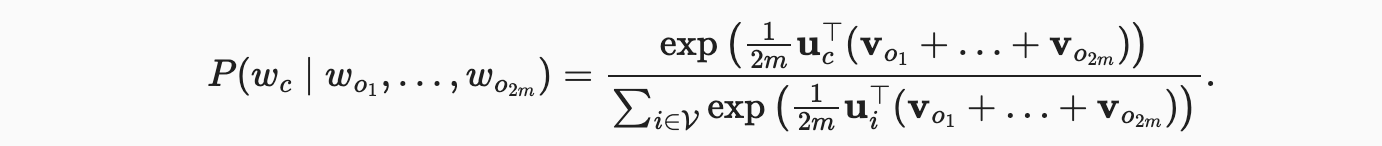
======w 집합을 W, (v벡터의 합/2m)을 v'로 간소화하여 표현하면,======
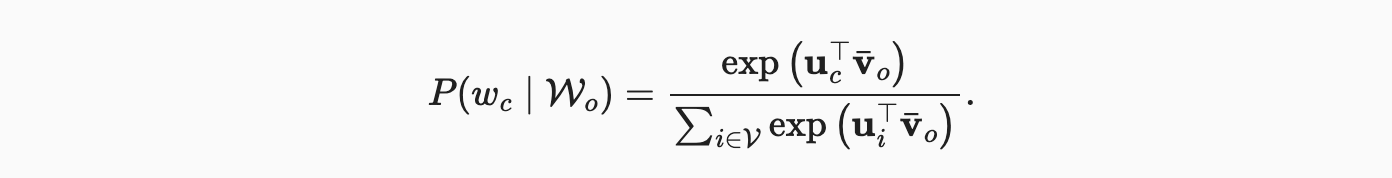


*  Text sequence 길이 = T
*word at time step = t(t번째 단어)
*context windows size = m
일 때, <br>CBOW의 확률 함수는 <b>주어진 context words가 주어졌을 때 모든 center words를 generate할 확률이다.

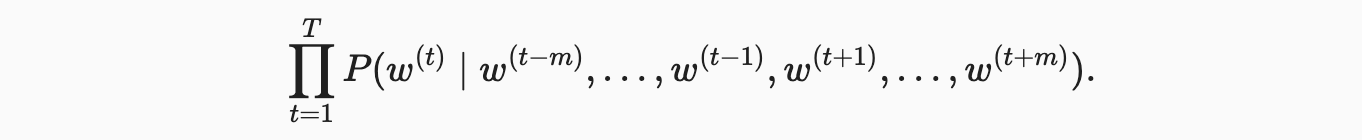

<h4>15.1.4.1. Training</h4>

*   Training 과정도 skip-gram과 유사하게 위의 확률함소를 최대화하는 방향(=아래의 logged loss function의 최소화)으로 진행.

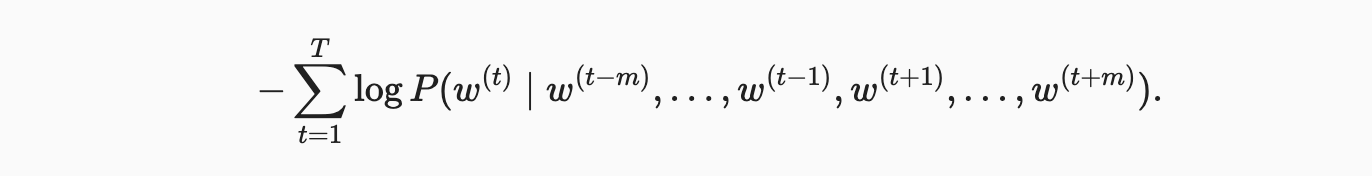

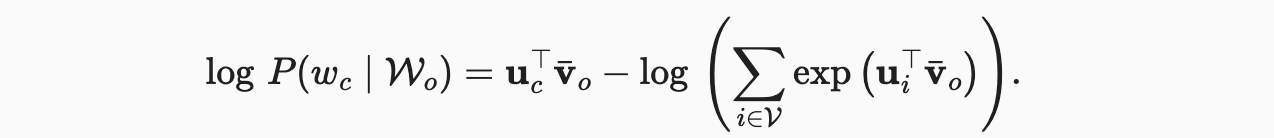

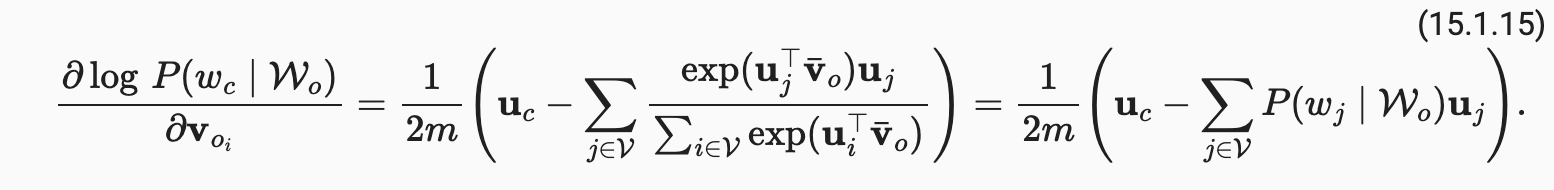

<h4>15.1.5. Summary</h4>

*  Word vector는 단어를 표현하는 데 사용되는 벡터이고, 단어를 실제 벡터에 mapping하는 기술을 단어 임베딩이라고 한다.
* word2vec 이라는 tool에는 skip-gram모델과 CBOW(Continuous Bag of Words)모델이 모두 포함되어 있다.
* Skip-gram 모델은 중심단어가 주변단어를 생성하고, CBOW는 주변 단어가 중심 단어를 생성한다고 가정한다.

In [ ]:
#끝